In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Melbourne_housing_FULL.csv')

# Data Preprocessing

<Axes: ylabel='Price'>

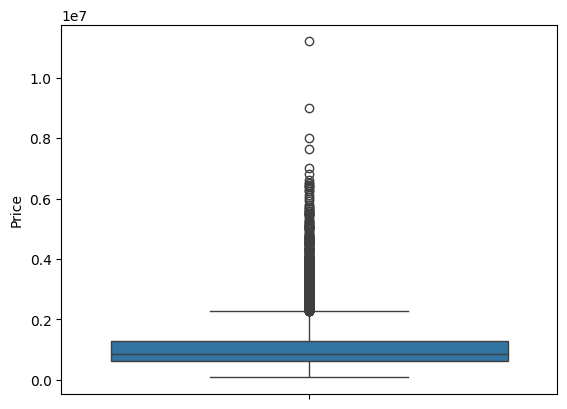

In [3]:
#box plot of price
import seaborn as sns
sns.boxplot(df['Price'])


In [4]:
# removing outliers from price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f"Number of outliers in Price: {outliers.shape[0]}")


df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
print(f"Number of rows after removing outliers: {df.shape[0]}")


Number of outliers in Price: 1278
Number of rows after removing outliers: 25969


In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:

# Removing 'Latitude', 'Longitude', and 'Postcode' from the selected features
df_selected = df[['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]

df_selected.head()


,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1480000.0,2.0,1.0,1.0,202.0,NaN,NaN
2,2,1035000.0,2.0,1.0,0.0,156.0,79.0,1900.0
4,3,1465000.0,3.0,2.0,0.0,134.0,150.0,1900.0
5,3,850000.0,3.0,2.0,1.0,94.0,NaN,NaN
6,4,1600000.0,3.0,1.0,2.0,120.0,142.0,2014.0


In [7]:
# handling missing values
missing_values = df_selected.isnull().sum()

print("Missing Values Before Dropping:\n", missing_values)

df_selected = df_selected.dropna()

missing_values_after = df_selected.isnull().sum()
print("\nMissing Values After Dropping:\n", missing_values_after)

df_selected.head()


Missing Values Before Dropping:
 Rooms               0
Price               0
Bedroom2         6249
Bathroom         6253
Car              6619
Landsize         8939
BuildingArea    15920
YearBuilt       14560
dtype: int64

Missing Values After Dropping:
 Rooms           0
Price           0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64


,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
2,2,1035000.0,2.0,1.0,0.0,156.0,79.0,1900.0
4,3,1465000.0,3.0,2.0,0.0,134.0,150.0,1900.0
6,4,1600000.0,3.0,1.0,2.0,120.0,142.0,2014.0
11,3,1876000.0,4.0,2.0,0.0,245.0,210.0,1910.0
14,2,1636000.0,2.0,1.0,2.0,256.0,107.0,1890.0


In [8]:
# Display the number of rows
num_rows = df_selected.shape[0]

print("Number of rows in the dataset:", num_rows)


Number of rows in the dataset: 8381


In [9]:
df_selected.head()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
2,2,1035000.0,2.0,1.0,0.0,156.0,79.0,1900.0
4,3,1465000.0,3.0,2.0,0.0,134.0,150.0,1900.0
6,4,1600000.0,3.0,1.0,2.0,120.0,142.0,2014.0
11,3,1876000.0,4.0,2.0,0.0,245.0,210.0,1910.0
14,2,1636000.0,2.0,1.0,2.0,256.0,107.0,1890.0


In [10]:
# making age column
current_year = 2025
df_selected['Age'] = current_year - df_selected['YearBuilt']
df_selected['Age'] = df_selected['Age'].round()

df_selected.head()


,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Age
2,2,1035000.0,2.0,1.0,0.0,156.0,79.0,1900.0,125.0
4,3,1465000.0,3.0,2.0,0.0,134.0,150.0,1900.0,125.0
6,4,1600000.0,3.0,1.0,2.0,120.0,142.0,2014.0,11.0
11,3,1876000.0,4.0,2.0,0.0,245.0,210.0,1910.0,115.0
14,2,1636000.0,2.0,1.0,2.0,256.0,107.0,1890.0,135.0


In [11]:
df_selected.describe()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Age
count,8381.000000,8.381000e+03,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000
mean,3.031381,9.740059e+05,3.012648,1.588355,1.658394,509.630235,141.475642,1966.965040,58.034960
std,0.929543,4.494796e+05,0.932742,0.662301,0.957010,1083.839490,74.381530,36.180565,36.180565
min,1.000000,1.310000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,6.000000
25%,2.000000,6.270000e+05,2.000000,1.000000,1.000000,200.000000,98.000000,1950.000000,25.000000
50%,3.000000,8.620000e+05,3.000000,2.000000,2.000000,455.000000,129.000000,1970.000000,55.000000
75%,4.000000,1.255000e+06,4.000000,2.000000,2.000000,643.000000,171.000000,2000.000000,75.000000
max,12.000000,2.285000e+06,12.000000,8.000000,10.000000,42800.000000,1561.000000,2019.000000,829.000000


In [12]:
# lebel encoding categorical values
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df_selected['Rooms'] = label_encoder.fit_transform(df_selected['Rooms'])
df_selected['Bathroom'] = label_encoder.fit_transform(df_selected['Bathroom'])
df_selected['Car'] = label_encoder.fit_transform(df_selected['Car'])


df_selected.head()


,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Age
2,1,1035000.0,2.0,0,0,156.0,79.0,1900.0,125.0
4,2,1465000.0,3.0,1,0,134.0,150.0,1900.0,125.0
6,3,1600000.0,3.0,0,2,120.0,142.0,2014.0,11.0
11,2,1876000.0,4.0,1,0,245.0,210.0,1910.0,115.0
14,1,1636000.0,2.0,0,2,256.0,107.0,1890.0,135.0


In [13]:
# Normalizing discrete numerical values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['Landsize', 'BuildingArea', 'Age']

df_selected[columns_to_normalize] = scaler.fit_transform(df_selected[columns_to_normalize])

df_selected.head()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Age
2,1,1035000.0,2.0,0,0,0.003645,0.050609,1900.0,0.144593
4,2,1465000.0,3.0,1,0,0.003131,0.096092,1900.0,0.144593
6,3,1600000.0,3.0,0,2,0.002804,0.090967,2014.0,0.006075
11,2,1876000.0,4.0,1,0,0.005724,0.134529,1910.0,0.132442
14,1,1636000.0,2.0,0,2,0.005981,0.068546,1890.0,0.156744


# Data Splitting


In [15]:
# dataset splitting
X = df_selected.drop(['Price', 'YearBuilt'], axis=1)
y = df_selected['Price']
print(X.shape)
print(y.shape)


(8381, 7)
(8381,)


In [16]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6704, 7)
X_test shape: (1677, 7)
y_train shape: (6704,)
y_test shape: (1677,)


# Model training and visualization

In [17]:
#installing required libraries for training
!pip install xgboost
!pip install lightgbm
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00


In [19]:
#training and hypermarameter tuning

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the regression models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror'),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)  # Suppress output
}

# Dictionary to store results
results = {}

# Hyperparameter tuning for each model
for name, model in models.items():
    # Define parameter grid for RandomizedSearchCV
    if name == "Random Forest":
        param_dist = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    elif name == "Gradient Boosting":
        param_dist = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    elif name == "XGBoost":
        param_dist = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    elif name == "LightGBM":
        param_dist = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [-1, 10, 20]
        }
    elif name == "CatBoost":
        param_dist = {
            'iterations': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'depth': [3, 5, 7]
        }

    # Randomized search for hyperparameter tuning
    search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)

    # Evaluate the best model from the search
    best_model = search.best_estimator_ # This was previously named best_model, overwriting the global variable.
    predictions = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    results[name] = {'RMSE': rmse, 'R2': r2, 'model': best_model} # Store the trained model
    print(f"{name}:\n  RMSE: {rmse:.2f}\n  R² Score: {r2:.4f}\n")

# Identify the best model based on R² score
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = results[best_model_name]['model'] # Access the trained model
print(f"✅ Best Model Based on R² Score: {best_model_name}")


Random Forest:
  RMSE: 290486.58
  R² Score: 0.5843

Gradient Boosting:
  RMSE: 289321.99
  R² Score: 0.5876

XGBoost:
  RMSE: 289502.28
  R² Score: 0.5871

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 6704, number of used features: 7
[LightGBM] [Info] Start training from score 974724.755370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

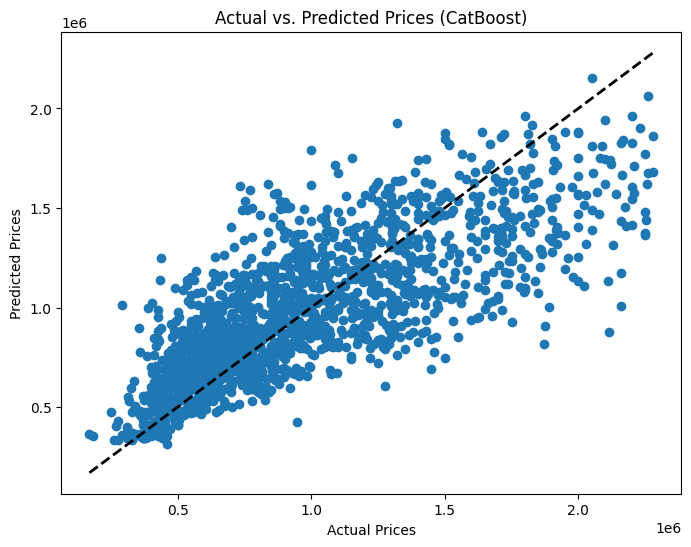

In [20]:
# Predict on the test set using the best model to visualize
y_pred = best_model.predict(X_test)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs. Predicted Prices ({best_model_name})')
plt.show()